In [30]:
import numpy as np
import active
%load_ext autoreload
%autoreload 1
%aimport active

np.set_printoptions(precision=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # take the first two features only.
Y = iris.target

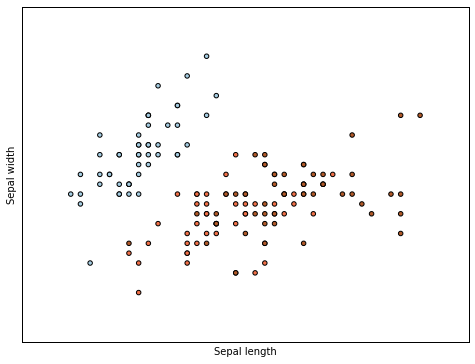

In [32]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [33]:
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
Y[Y==1] = -1
Y[Y==2] = -1
Y[Y==0] = +1

In [34]:
np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

In [35]:
X_training = X[training_index]
Y_training = Y[training_index]
X_testing = X[training_index]
Y_testing = Y[training_index]

In [ ]:
w = active.active(X_training, Y_training, M=1000, iterations=30, maxiter=500)

In [ ]:
(A, b) = active.active(X_training, Y_training, M=10000, iterations=5, maxiter=10)

In [ ]:
active.query(A, b, X_training, Y_training, 10000)

In [ ]:
b

In [ ]:
w = active.active(X_training, Y_training, iterations=3, sample = 1, testing = 1, M = None)

In [ ]:
predictions = active.linear_predictor(X_training, w)
results = predictions == Y_training
correct = np.count_nonzero(results)
accuracy = correct/X_training.shape[0]
print('**** Results ****')
print('The number of correct predictions was', correct)
print('The accuracy was therefore', accuracy*100, 'percent')

In [ ]:
predictions = active.linear_predictor(X_testing, w)
results = predictions == Y_testing
correct = np.count_nonzero(results)
accuracy = correct/X_testing.shape[0]
print('**** Results ****')
print('The number of correct predictions was', correct)
print('The accuracy was therefore', accuracy*100, 'percent')

In [36]:
def average_accuracy(n, X_testing, Y_testing, 
                     X_training, Y_training, iterations, center='ac', sample=1, M=None):
    total = 0
    total_correct = 0
    for i in range(n):
        w = active.active(X_training, Y_training, iterations, center=center, sample=sample, M=M)
        predictions = active.linear_predictor(X_testing, w)
        results = predictions == Y_testing
        correct = np.count_nonzero(results)
        total_correct = total_correct + correct
        total = total + X_testing.shape[0]
    return total_correct/total


In [82]:
n = 25
iterations = 50
average_accuracy(n, X_testing, Y_testing, 
                 X_training, Y_training, iterations, center='ac', sample=1, M=None)

0.68

In [100]:
import pandas as pd
import scipy.optimize as opt
from scipy.special import expit # The logistic sigmoid function 

In [101]:
names = ['diabetes', 'num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age']
data = pd.read_csv('diabetes_scale.csv', header=None, names=names)
data['diabetes'].replace(-1, 0, inplace=True) # The target variable need be 1 or 0, not 1 or -1
data['ones'] = np.ones((data.shape[0], 1)) # Add a column of ones
data.head()

,diabetes,num preg,plasma,bp,skin fold,insulin,bmi,pedigree,age,ones
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [102]:
Y = data['diabetes']
X = data[['num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age', 'ones']]

In [103]:
X = np.array(X)
Y = np.array(Y)

In [104]:
Y[Y==0] = -1

In [105]:
X

array([[-0.2941,  0.4874,  0.1803, ..., -0.5312, -0.0333,  1.    ],
       [-0.8824, -0.1457,  0.082 , ..., -0.7669, -0.6667,  1.    ],
       [-0.0588,  0.8392,  0.0492, ..., -0.4927, -0.6333,  1.    ],
       ..., 
       [-0.4118,  0.2161,  0.1803, ..., -0.8574, -0.7   ,  1.    ],
       [-0.8824,  0.2663, -0.0164, ..., -0.7686, -0.1333,  1.    ],
       [-0.8824, -0.0653,  0.1475, ..., -0.7976, -0.9333,  1.    ]])

In [106]:
Y

array([-1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1

In [107]:
np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

In [108]:
X_training = X[training_index]
Y_training = Y[training_index]
X_testing = X[training_index]
Y_testing = Y[training_index]

In [125]:
n = 10
iterations = 50
average_accuracy(n, X_testing, Y_testing, 
                 X_training, Y_training, iterations, center='random', sample=1, M=5)

0.5768229166666666